# Study of the Phase transition in the 2nn Ising Model by using DMRG

#### Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np

##### Data

In [17]:
hs=[2.4,3.6,5.44,7.2,8.4]
ls=[32,128,256]

z_l=[]
corr_l=[]
for l in ls: 
    z={}
    corr={}
    for h in hs:
        data = np.load(f"data/dataset_2nn/test_unet_periodic_2nn_{l}_l_{h}_h_100_n.npz")
        z[h] = data["density"]
        corr[h] = data["correlation"]
        
    z_l.append(z)
    corr_l.append(corr)

 #### Plots

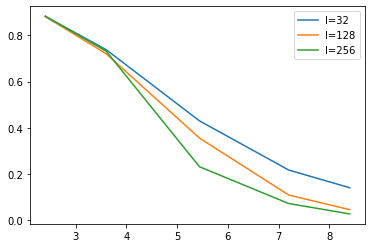

In [18]:
for i in range(len(ls)):
    chi=[]
    for h in hs:
        chi.append(np.average(corr_l[i][h]))

    plt.plot(hs,chi,label=f'l={ls[i]}')
plt.legend()
plt.show()

#### Critical behaviour

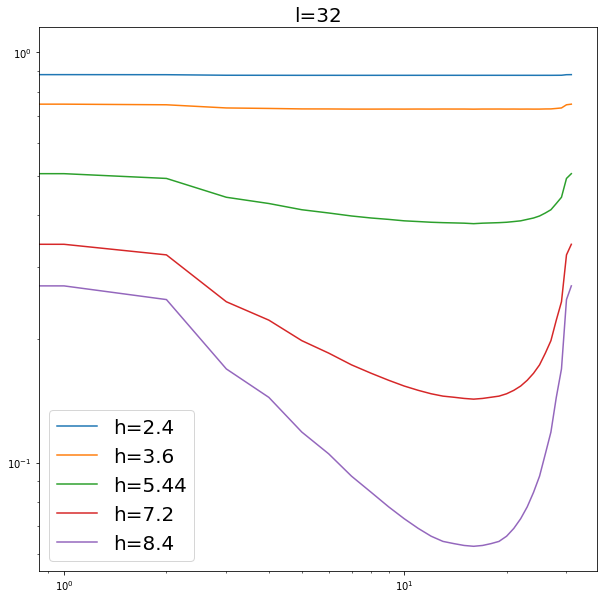

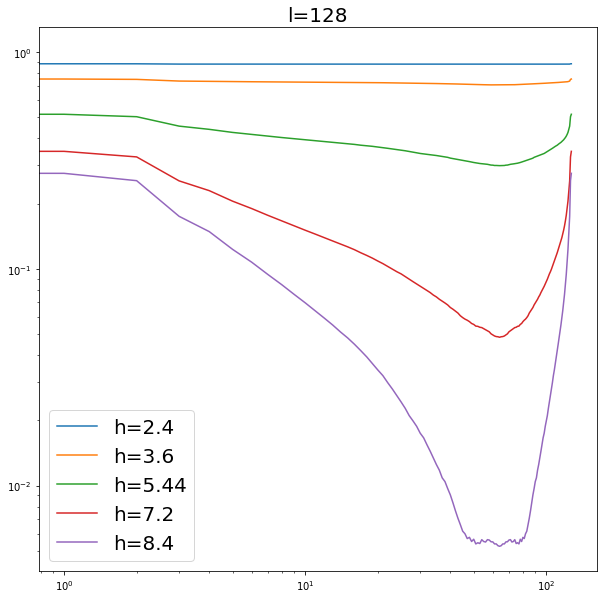

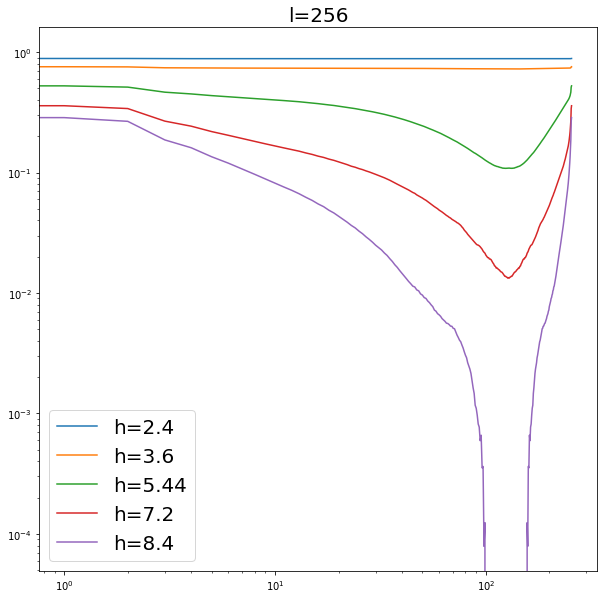

In [28]:
for i in range(len(ls)):
    plt.figure(figsize=(10,10))
    for h in hs:
        idx=np.arange(ls[i])
        xx=corr_l[i][h]
        for r in range(ls[i]):
            m = xx[:, idx, (idx + r) % ls[i]]
            if r == 0:
                ms = m.reshape(-1, 1, ls[i])
            else:
                ms = np.append(ms, m.reshape(-1, 1, ls[i]), axis=-2)
        ms=np.average(ms,axis=0)
        ms=np.average(ms,axis=-1)
        plt.plot(idx,ms,label=f'h={h}')
    
    plt.legend(fontsize=20)
    plt.title(f'l={ls[i]}',fontsize=20)
    plt.loglog()
    plt.show()
                